# Desafío 3 - Redes Neuronales
## Reconocimiento de imágenes y contexto a través de CNN

Integrantes: Andrea Faúndez Quezada - Israel Díaz García

Curso: Machine Learning Avanzado

Profesor: Francisco Altimiras González


## Instrucciones
Desarrollar un notebook en alguna de estas temáticas. La idea es que utilicen un notebook ya existente o creen uno propio donde apliquen estas técnicas a un data set. En notebook tiene que estar documentado de la siguiente forma:
* El problema que se está resolviendo.
* La descripción y/o visualización de data set que se está utilizando.
* La técnica que se utilizó, descripción de ella.
* Por que se utilizó esta, que otras alternativas existen.
* Como eligió los hyperparámetros.
* Discusión de los resultados.
* Próximos pasos para mejorar los resultados.

Tema a desarrollar: Reconocimiento de imágenes y contexto a través de CNN

## Desarrollo

El presente trabajo tiene por objeto construir un modelo que permita clasificar imágenes de canes según su raza. El dataset inicial consta de 20.580 imágenes, con 120 razas distintas.
Para abordar el problema se propone un modelo de Red Neuronal Convolucional (CNN) ya que esta técnica permite clasificar ... el problema es complejo debido a la cantidad de clases, razón por la cual se propone una CNN... no sé qué mas poner aquí.

### Carga de librerías a utilizar

In [1]:
import numpy as np
import pandas as pd 
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#para leer annotate
import xml.etree.ElementTree as ET

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms, datasets, models
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler, random_split
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

### Carga de imágenes y anotaciones

In [2]:
path_img = '/kaggle/input/dog-images-stanford/Images/Images/'
path_annot = '/kaggle/input/dog-images-stanford/annotation/Annotation/'

lista_razas = os.listdir(path_img)
num_clases = len(lista_razas)
print('{} razas'.format(num_clases))

n_total_imagenes = 0
for raza in lista_razas:
    n_total_imagenes += len(os.listdir(path_img+'{}'.format(raza)))
print('{} imagenes'.format(n_total_imagenes))

120 razas
20580 imagenes


### Mapeo de etiquetas

In [3]:
mapa_etiqueta = {}
mapa_etiqueta_rev = {}

for i, v in enumerate(lista_razas):
    mapa_etiqueta.update({v:i})
    mapa_etiqueta_rev.update({i:v})

In [4]:
mapa_etiqueta_rev

{0: 'Curly-coated_retriever',
 1: 'American_Staffordshire_terrier',
 2: 'Otterhound',
 3: 'Toy_poodle',
 4: 'Pomeranian',
 5: 'Irish_wolfhound',
 6: 'Beagle',
 7: 'Walker_hound',
 8: 'Great_Dane',
 9: 'Afghan_hound',
 10: 'Brabancon_griffon',
 11: 'Bull_mastiff',
 12: 'Basset',
 13: 'Malamute',
 14: 'Mexican_hairless',
 15: 'Norfolk_terrier',
 16: 'Tibetan_terrier',
 17: 'German_short-haired_pointer',
 18: 'Bedlington_terrier',
 19: 'Bloodhound',
 20: 'Irish_setter',
 21: 'Ibizan_hound',
 22: 'Papillon',
 23: 'Shetland_sheepdog',
 24: 'Toy_terrier',
 25: 'West_Highland_white_terrier',
 26: 'Groenendael',
 27: 'Collie',
 28: 'Keeshond',
 29: 'Shih-Tzu',
 30: 'Appenzeller',
 31: 'Schipperke',
 32: 'Kerry_blue_terrier',
 33: 'Soft-coated_wheaten_terrier',
 34: 'Japanese_spaniel',
 35: 'Bernese_mountain_dog',
 36: 'French_bulldog',
 37: 'Blenheim_spaniel',
 38: 'Boston_bull',
 39: 'English_springer',
 40: 'Dandie_Dinmont',
 41: 'Rottweiler',
 42: 'Miniature_pinscher',
 43: 'Affenpinscher',

In [5]:
def mostrar_imagenes_dir(raza, path_img, cant_img):
    plt.figure(figsize=(16,16))
    img_dir = path_img+"{}/".format(raza)
    images = os.listdir(img_dir)[:cant_img]
    for i in range(cant_img):
        img = mpimg.imread(img_dir + images[i])
        plt.subplot(cant_img/4+1, 4, i+1)
        plt.imshow(img)
        plt.axis('off')

Curly-coated_retriever


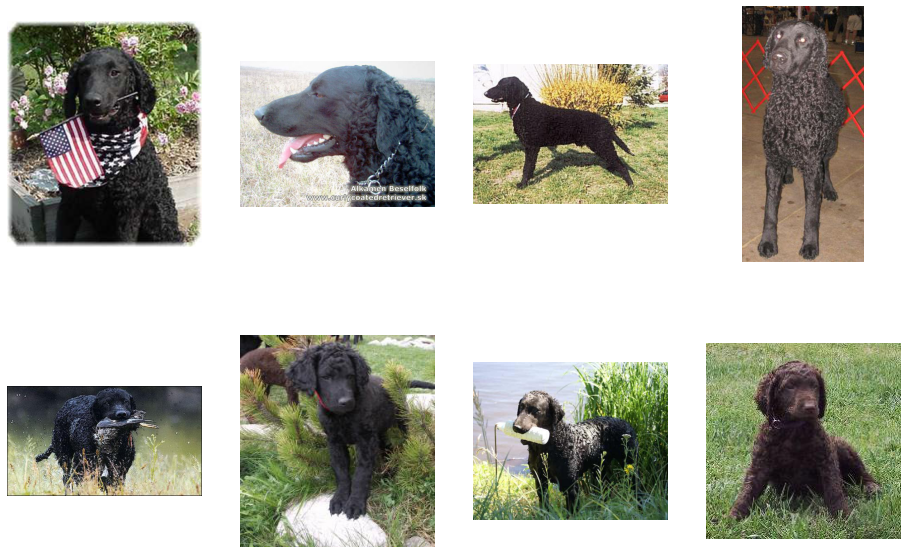

In [6]:
print(lista_razas[0])
mostrar_imagenes_dir(lista_razas[0], path_img,8)

In [9]:
%%time 

from PIL import Image

if not os.path.exists('/kaggle/working/data'):
    os.mkdir('/kaggle/working/data')
    
for raza in lista_razas:
    if not os.path.exists('/kaggle/working/data/' + raza):
        os.mkdir('/kaggle/working/data/' + raza)

print('Se han creado {} carpetas para almacenar diferentes imagenes recortada de los perros.'.format(len(os.listdir('/kaggle/working/data'))))

for raza in os.listdir('/kaggle/working/data/'):
    for file in os.listdir(path_annot+'{}'.format(raza)):
        img = Image.open(path_img+'{}/{}.jpg'.format(raza, file))
        tree = ET.parse(path_annot+'{}/{}'.format(raza, file))
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        img = img.crop((xmin, ymin, xmax, ymax))
        img = img.convert('RGB')
        img = img.resize((224, 224))
        img.save('/kaggle/working/data/' + raza + '/' + file + '.jpg')

Se han creado 120 carpetas para almacenar diferentes imagenes recortada de los perros.
CPU times: user 2min 1s, sys: 5.66 s, total: 2min 6s
Wall time: 3min 20s


Appenzeller


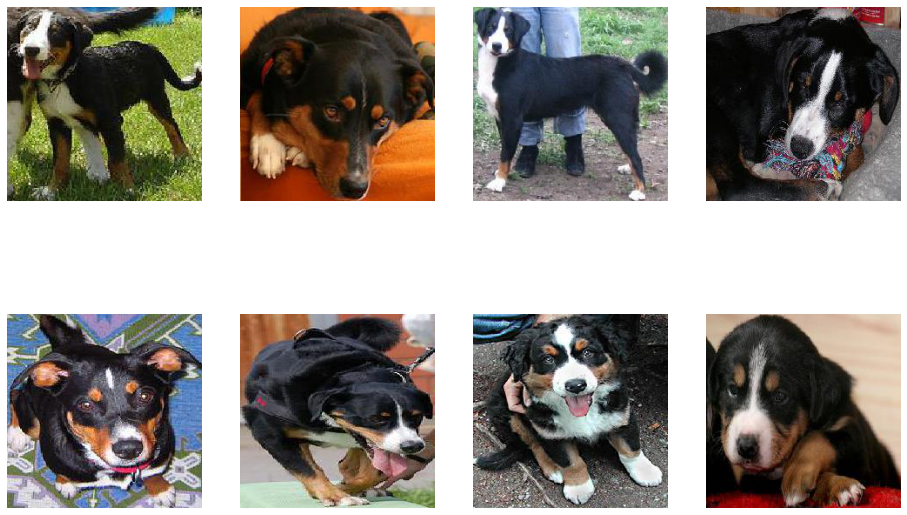

In [10]:
# Prevualizando imagenes

path_img_d = '/kaggle/working/data/'
lista_razas = os.listdir(path_img_d)

print(lista_razas[-5])
mostrar_imagenes_dir(lista_razas[-5], path_img_d, 8)

### Carga de imágenes generadas
Se carga la data de las imágenes preprocesadas a través de ImageFolder. Se almacena en dataset, donde cada fila corresponde a una tupla (Tensor, Target).

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = datasets.ImageFolder('/kaggle/working/data/', transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 20580
    Root location: /kaggle/working/data/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [14]:
dataset.classes

['Affenpinscher',
 'Afghan_hound',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Basenji',
 'Basset',
 'Beagle',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Black-and-tan_coonhound',
 'Blenheim_spaniel',
 'Bloodhound',
 'Bluetick',
 'Border_collie',
 'Border_terrier',
 'Borzoi',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Boxer',
 'Brabancon_griffon',
 'Briard',
 'Brittany_spaniel',
 'Bull_mastiff',
 'Cairn',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Chow',
 'Clumber',
 'Cocker_spaniel',
 'Collie',
 'Curly-coated_retriever',
 'Dandie_Dinmont',
 'Dhole',
 'Dingo',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'Flat-coated_retriever',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Giant_schnauzer',
 'Golden_retriever',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Groenendael',


### Balance del dataset

In [15]:
%%time
cuenta_clases = {}
for i in range (len(dataset)):
    if str(dataset[i][1]) not in cuenta_clases:
        cuenta_clases[str(dataset[i][1])]=1
    else:
        cuenta_clases[str(dataset[i][1])]+=1

CPU times: user 2min 32s, sys: 1.61 s, total: 2min 34s
Wall time: 1min 17s


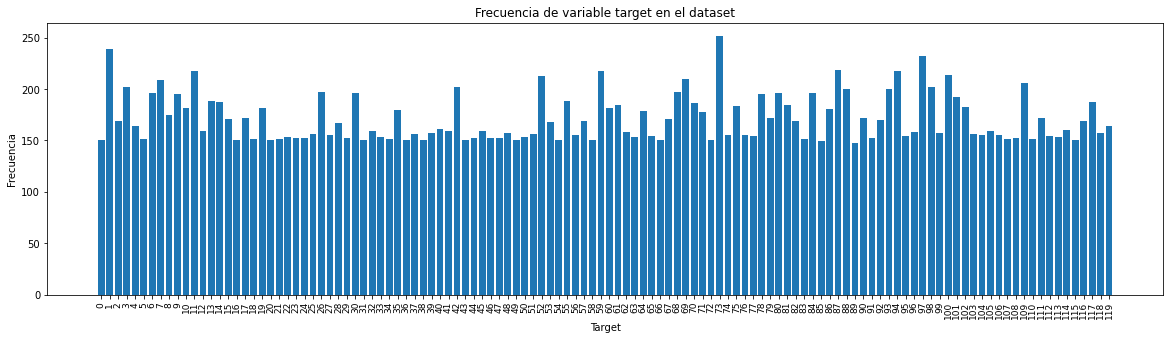

In [16]:
plt.figure(figsize=(20,5))
plt.bar(cuenta_clases.keys(), cuenta_clases.values())
plt.xticks(rotation=90,fontsize=9)
plt.title('Frecuencia de variable target en el dataset')
plt.ylabel('Frecuencia')
plt.xlabel('Target')

plt.show()

In [17]:
min(cuenta_clases.values())

148

Se observa que las clases minoritarias tienen 148 imágenes de perros de la misma raza. Si se considera un 56% de entrenamiento, 24% de validación y 20% de test, entonces el dataset para entrenar debe contener 82 imágenes de cada clase aproximadamente.

### Train - validation - test split

In [18]:
#Splits
batch_size = 128
torch.manual_seed(123)

image_transforms = {

    'train':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    'test':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_imgs = datasets.ImageFolder(path_img_d)
train_data_len = int(len(data_imgs)*0.8)
valid_data_len = int((len(data_imgs) - train_data_len)/2)
test_data_len = int(len(data_imgs) - train_data_len - valid_data_len)
train_data, val_data, test_data = random_split(data_imgs, [train_data_len, valid_data_len, test_data_len])
train_data.dataset.transform = image_transforms['train']
val_data.dataset.transform = image_transforms['test']
test_data.dataset.transform = image_transforms['test']
print(len(train_data), len(val_data), len(test_data))

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)



16464 2058 2058


In [19]:
#Tensores
trainiter = iter(train_loader)
features, labels = next(trainiter)
print(features.shape, labels.shape)

torch.Size([128, 3, 224, 224]) torch.Size([128])


In [ ]:
target_idx = {}
for i in list(set(dataset.targets)):
    target_idx[i] = (targets==i).nonzero()

In [ ]:
muestra_5 = list(torch.utils.data.SubsetRandomSampler((targets==5).nonzero()))[:5]
muestra_5

In [ ]:
indices = list(range(dataset_size))

In [ ]:
torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=2,
                                       pin_memory=True, sampler=sampler)

In [ ]:
for i in sampler:
    print(i)

In [ ]:
torch.utils.data.random_split(dataset, (len(dataset)*0.8, len(dataset)*0.20))

In [ ]:
#trainset = torch.utils.data.Dataset(root='/kaggle/input/datadogs/lists/train_list.mat', train=True,
#                                        download=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                          shuffle=True, num_workers=2)

#testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                       download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                         shuffle=False, num_workers=2)